In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('ticks')
import re
import matplotlib.ticker as ticker
# Enable inline plotting  
%matplotlib inline

In [3]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 02:16:08) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.24.2
Numpy version 1.16.4


In [24]:
data_comet_S = 'dff-comm-updated-rmsd-traj-split.csv'
data_comet_SG = 'dff-comm-updated-rmsd-traj-split-GA.csv'
data_SuperMIC_S = 'dff-comm-updated-rmsd-traj-split-SuperMIC.csv'
data_SuperMIC_SG = 'dff-comm-updated-rmsd-traj-split-GA-SuperMIC.csv'

In [25]:
dff_comet_S = pd.read_csv(data_comet_S)
dff_comet_SG = pd.read_csv(data_comet_SG)
dff_SuperMIC_S = pd.read_csv(data_SuperMIC_S)
dff_SuperMIC_SG = pd.read_csv(data_SuperMIC_SG)

In [26]:
dff_comet_S.columns

Index(['Unnamed: 0', 'blocks', 'repeat', 'P_ID', 't_comp', 't_IO',
       't_IO_plus_t_comp', 't_end_loop', 't_init', 'Communication',
       'std_t_comp', 'std_t_IO', 'std_t_IO_plus_t_comp', 'std_t_end_loop',
       'std_t_init', 'std_comm'],
      dtype='object')

In [27]:
dff_comet_S.loc[1, "Communication"]

24.2565690279

In [28]:
dff_SuperMIC_S.loc[1, "Communication"]

8.4039375782

In [35]:
dff_comet_S["Communication"][0]

0.011594629287700001

In [33]:
dff_comet_S

,Unnamed: 0,blocks,repeat,P_ID,t_comp,t_IO,t_IO_plus_t_comp,t_end_loop,t_init,Communication,std_t_comp,std_t_IO,std_t_IO_plus_t_comp,std_t_end_loop,std_t_init,std_comm
0,0,1,3.0,0.0,225.720698,799.416394,1027.133724,0.009202,0.167803,0.011595,5.402025,5.215511,10.397883,0.004146,0.002210,0.002185
1,1,24,3.5,23.0,11.581474,37.798067,49.119199,0.009916,0.284256,24.256569,0.306188,1.218912,1.581867,0.012056,0.060771,4.456158
2,2,48,3.5,47.0,5.711946,18.384817,24.008323,0.004307,0.238459,14.047676,0.065747,0.176167,0.096181,0.000274,0.046888,4.880287
3,3,72,3.5,71.0,3.901868,12.434412,16.280584,0.004075,0.216240,7.630680,0.035765,0.143774,0.172694,0.000046,0.046584,2.542745
4,4,96,3.0,95.0,3.003150,9.451513,12.440340,0.003802,0.232845,6.038970,0.109718,0.330083,0.426661,0.000297,0.077101,2.423405
5,5,144,3.0,143.0,2.100760,6.670177,8.780164,0.003848,0.232711,5.638175,0.225169,0.662708,0.908370,0.000261,0.058832,1.724388
6,6,192,3.0,191.0,1.554351,4.955848,6.439769,0.004070,0.265674,7.300211,0.065006,0.226645,0.303089,0.000349,0.058412,3.035320


/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/oliver/anaconda3/envs/mda3/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/U

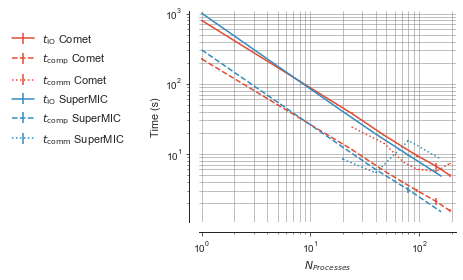

In [44]:
import matplotlib.patches as mpatches
from matplotlib.pyplot import *
import matplotlib

plt.rcParams['font.size'] = 9
fig = plt.figure(figsize=(7,4))
axes = fig.add_subplot(1,1,1)
width = 0.85 

# colors for HPC machines
color = {'comet': sns.color_palette()[0],
         'supermic': sns.color_palette()[1],
         'bridges': sns.color_palette()[2],
        }
style = {'t_IO': "-", 
         't_comp': "--",
         't_comm': ":",
        }

dff = [dff_comet_S, dff_comet_SG, dff_SuperMIC_S, dff_SuperMIC_SG]
labels = ['Comet ($24$ cores per node)',
          'Comet-GA ($24$ cores per node)',
          'SuperMIC ($20$ cores per node)',
          'SuperMIC-GA ($20$ cores per node)']

# set Comm to Nan for N=1 (makes no sense, should be excluded from plot)
for df in dff:
    df["Communication"][0] = np.NAN
    df["std_comm"][0] = np.NAN

dff[0].index = dff[0].loc[:,'blocks']
dff[1].index = dff[1].loc[:,'blocks']
dff[2].index = dff[2].loc[:,'blocks']
dff[3].index = dff[3].loc[:,'blocks']

yerrs1 = [dff[0]['std_t_IO'].values.transpose().tolist(),
          dff[0]['std_t_comp'].values.transpose().tolist(),
          dff[0]['std_comm'].values.transpose().tolist(),
         ]
dff[0].loc[:,'t_IO'].plot(yerr=yerrs1[0], 
                          linestyle=style["t_IO"],
                          color=color["comet"],
                          ax=axes)
dff[0].loc[:,'t_comp'].plot(yerr=yerrs1[1], 
                          linestyle=style["t_comp"],
                          color=color["comet"],
                          ax=axes)
dff[0].loc[:,'Communication'].plot(yerr=yerrs1[1], 
                          linestyle=style["t_comm"],
                          color=color["comet"],
                          ax=axes)


#yerrs2 = [dff[1]['std_t_IO'].values.transpose().tolist(),dff[1]['std_t_comp'].values.transpose().tolist()]
#dff[1].loc[:,['t_IO','t_comp']].plot(yerr=yerrs2,ax=axes)

yerrs3 = [dff[2]['std_t_IO'].values.transpose().tolist(),dff[2]['std_t_comp'].values.transpose().tolist()]
dff[2].loc[:,'t_IO'].plot(yerr=yerrs3[0], 
                          linestyle=style["t_IO"],
                          color=color["supermic"],
                          ax=axes)
dff[2].loc[:,'t_comp'].plot(yerr=yerrs3[1], 
                          linestyle=style["t_comp"],
                          color=color["supermic"],
                          ax=axes)
dff[2].loc[:,'Communication'].plot(yerr=yerrs3[1], 
                          linestyle=style["t_comm"],
                          color=color["supermic"],
                          ax=axes)

#yerrs4 = [dff[3]['std_t_IO'].values.transpose().tolist(),dff[3]['std_t_comp'].values.transpose().tolist()]
#dff[3].loc[:,['t_IO','t_comp']].plot(yerr=yerrs4,ax=axes)

plt.style.use('ggplot')
sns.set_style('ticks')
axes.set_xlabel('$N_{Processes}$')   
axes.set_ylabel('Time (s)')
plt.xscale('log')
plt.yscale('log')

axes.set_ylim(0, 1100)
axes.set_xlim(0.95, 220)
axes.yaxis.grid(which='major', linewidth='0.5', color='grey')
axes.xaxis.grid(which='major', linewidth='0.5', color='grey')
axes.yaxis.grid(which='minor', linewidth='0.5', color='grey')
axes.xaxis.grid(which='minor', linewidth='0.5', color='grey')  
sns.despine(offset=10, ax=axes)
fig.subplots_adjust(bottom=0.2)
legends = [r'$t_\mathrm{IO}$ Comet',
           r'$t_\mathrm{comp}$ Comet ',
           r'$t_\mathrm{comm}$ Comet ',
           #r'$t_\mathrm{IO}$ Comet-GA ($24$ cores per node)',
           #r'$t_\mathrm{comp}$ Comet-GA ($24$ cores per node)',
           r'$t_\mathrm{IO}$ SuperMIC',
           r'$t_\mathrm{comp}$ SuperMIC',
           r'$t_\mathrm{comm}$ SuperMIC',           
           #r'$t_\mathrm{IO}$ SuperMIC-GA ($20$ cores per node)',
           #r'$t_\mathrm{comp}$ SuperMIC-GA ($20$ cores per node)'
          ]

lgd = plt.legend(legends,loc='upper right', fontsize=11, bbox_to_anchor=(-0.25, 0.95),frameon=False, shadow=True, ncol=1)
plt.tight_layout()

fig_name = 'Clusters_IO_compute_scaling_splitting'
fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

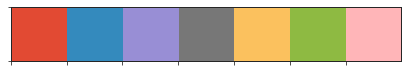

In [13]:
sns.palplot(sns.color_palette())